## Visualize results NARMAX experiments

In [16]:
using Revise
using JLD
using MAT
using Statistics
using LaTeXStrings

In [17]:
using StatsPlots
using ColorSchemes
using Plots
pyplot();

alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

In [18]:
ix_trn = 4.05*1e4:127200;
T_trn = length(ix_trn);

### Root Mean Squared Error

In [ ]:
model_orders = [4,7,10,13,16]
which_orders = [1,2,3,4,5]
num_orders = length(which_orders)

RMS_sim_FEM = zeros(num_orders,)
RMS_prd_FEM = zeros(num_orders,)
RMS_sim_RLS = zeros(num_orders,)
RMS_prd_RLS = zeros(num_orders,)
RMS_sim_ILS = zeros(num_orders,)
RMS_prd_ILS = zeros(num_orders,)

for (ii,order) in enumerate(model_orders)

    RMS_prd_FEM[ii] = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "RMS_prd_FEM")
    RMS_sim_FEM[ii] = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "RMS_sim_FEM")

    RMS_prd_RLS[ii] = load("results/silverbox-NARMAX-RLS_order"*string(order)*"_results.jld", "RMS_prd_RLS")
    RMS_sim_RLS[ii] = load("results/silverbox-NARMAX-RLS_order"*string(order)*"_results.jld", "RMS_sim_RLS")

    ILS_data = matread("results/silverbox-NARMAX-ILS_order"*string(order)*"_results.mat")
    RMS_prd_ILS[ii] = ILS_data["RMS_prd_ILS"]
    RMS_sim_ILS[ii] = ILS_data["RMS_sim_ILS"]

end    

In [20]:
[RMS_prd_ILS RMS_prd_RLS RMS_prd_FEM] .* 1e3

5×3 Array{Float64,2}:
 129.4       19.8221   20.3333
   0.121845   1.35292   0.324636
   0.221897   1.70344   0.142933
   0.20622    2.0892    0.116209
 NaN          2.14092   0.10635

In [21]:
[RMS_sim_ILS RMS_sim_RLS RMS_sim_FEM] .* 1e3

5×3 Array{Float64,2}:
  49.4815    54.1056  49.4067
   0.648421  54.1049   5.87035
 NaN         54.1042   0.718774
   0.54691   54.1035   0.421014
 NaN         54.1029   0.609471

### Free Energy

In [ ]:
index = 1:(127200 - 40500)
FE_m = zeros(length(index), num_orders)

for (ii,order) in enumerate(model_orders)
    
    Fq = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "Fq")
    FE_m[:,ii] = Fq[index,end]
    
end

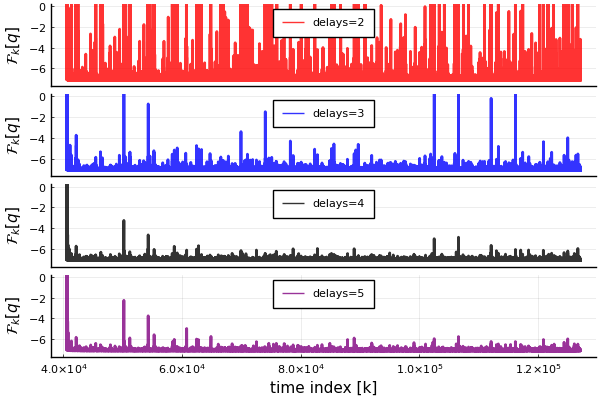

In [23]:
# p10 = plot(1:T_trn, FE_m[:,1], label="delays=1", alpha=0.3, color="green", xlabel="time [k]", ylabel=L"Free energy $F_k[q]$")
p110a = plot(ix_trn[index], FE_m[:,2], label="delays=2", linewidth=2,  alpha=0.8, color="red", ylims=[-7.5,0], xticks=:none, ylabel=L"$\mathcal{F}_k[q]$", legend=:top)
p110b = plot(ix_trn[index], FE_m[:,3], label="delays=3", linewidth=2, alpha=0.8, color="blue", ylims=[-7.5,0], xticks=:none, ylabel=L"$\mathcal{F}_k[q]$", legend=:top)
p110c = plot(ix_trn[index], FE_m[:,4], label="delays=4", linewidth=2, alpha=0.8, color="black", ylims=[-7.5,0], xticks=:none, ylabel=L"$\mathcal{F}_k[q]$", legend=:top)
p110d = plot(ix_trn[index], FE_m[:,5], label="delays=5", linewidth=2, alpha=0.8, color="purple", ylims=[-7.5,0], xlabel="time index [k]", ylabel=L"$\mathcal{F}_k[q]$", legend=:top)
p110 = plot(p110a, p110b, p110c, p110d, layout=(4,1), size=(600,400))

In [24]:
savefig(p110, "figures/Fq-comparisons_split.png")

In [25]:
FE_m[end,:]

5-element Array{Float64,1}:
  3.725737625827577
 -7.041000796076048
 -7.106430616253704
 -7.1065212927378525
 -7.101645967871264

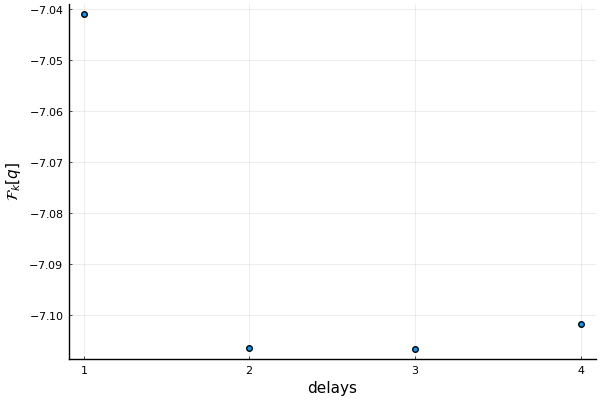

In [26]:
scatter(FE_m[end,2:end], xlabel="delays", label="", ylabel=L"$\mathcal{F}_k[q]$")